<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.tools as tls

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
print(df.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
print(df.head())
print(df.tail())
print(df.shape)

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
def extract_education(text):
    if pd.isna(text):
        return np.nan
    words = text.split()[:2]
    education = ' '.join(words).lower()
    if 'высшее' in education and 'неоконченное' not in education:
        return 'высшее'
    elif 'неоконченное' in education:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education:
        return 'среднее специальное'
    elif 'среднее' in education:
        return 'среднее'
    return np.nan

df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)
print(df['Образование'].unique())
df = df.drop('Образование и ВУЗ', axis=1)

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
def extract_gender_age(text):
    if pd.isna(text):
        return np.nan, np.nan
    parts = text.split(' , ')
    gender_text = parts[0].strip()
    age_text = parts[1].strip()
    
    if 'Мужчина' in gender_text:
        gender = 'М'
    elif 'Женщина' in gender_text:
        gender = 'Ж'
    else:
        gender = np.nan
    
    age = int(age_text.split()[0])
    
    return gender, age

df[['Пол', 'Возраст']] = df['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_age(x)))
gender_counts = df['Пол'].value_counts()
print(gender_counts['М'])
print(gender_counts['Ж'])
df = df.drop('Пол, возраст', axis=1)

36211
8533


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

def exp_to_months(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s == 'Не указано':
        return np.nan

    head = s.split('\n', 1)[0]
    head = re.sub(r'^\s*Опыт работы[:\s]*', '', head, flags=re.IGNORECASE)

    y_match = re.search(r'(\d+)\s*(?:год|года|лет|г\.)\b', head, flags=re.IGNORECASE)
    m_match = re.search(r'(\d+)\s*(?:месяц|месяца|месяцев|мес\.)\b', head, flags=re.IGNORECASE)

    years = int(y_match.group(1)) if y_match else 0
    months = int(m_match.group(1)) if m_match else 0

    if not y_match and not m_match:
        return np.nan

    return years * 12 + months

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(exp_to_months)
df = df.drop(columns=['Опыт работы'])

median_exp_months = int(df['Опыт работы (месяц)'].dropna().median())
print(median_exp_months)

100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def extract_city_relocation(text):
    if pd.isna(text):
        return np.nan, False, False
    
    parts = [p.strip() for p in text.split(',')]
    
    city = parts[0]
    if 'м.' in city:
        city = city.split('м.')[0].strip()
    
    if city == 'Москва':
        city_category = 'Москва'
    elif city == 'Санкт-Петербург':
        city_category = 'Санкт-Петербург'
    elif city in million_cities:
        city_category = 'город-миллионник'
    else:
        city_category = 'другие'
    
    relocation_text = ' '.join(parts[1:])
    relocation = False
    if any(phrase in relocation_text for phrase in ['готов к переезду', 'готова к переезду', 'хочу переехать']):
        relocation = True
    
    business_trips = False
    if any(phrase in relocation_text for phrase in ['готов к командировкам', 'готова к командировкам', 'готов к редким командировкам', 'готова к редким командировкам']):
        business_trips = True
    
    return city_category, relocation, business_trips

df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_relocation(x)))
df['Готовность к командировкам'] = df['Готовность к командировкам'].fillna(False)
relocation_pct = (df['Готовность к переезду'].sum() / len(df)) * 100
business_trips_pct = (df['Готовность к командировкам'].sum() / len(df)) * 100
print(f"{relocation_pct:.2f}")
print(f"{business_trips_pct:.2f}")
df = df.drop('Город, переезд, командировки', axis=1)

100.00
99.83


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for category in employment_categories:
    df[f'Занятость_{category}'] = df['Занятость'].apply(lambda x: category in str(x).lower() if pd.notna(x) else False)

for category in schedule_categories:
    df[f'График_{category}'] = df['График'].apply(lambda x: category in str(x).lower() if pd.notna(x) else False)

print("Занятость:")
for category in employment_categories:
    print(f"{category}: {df[f'Занятость_{category}'].sum()}")
print("\nГрафик:")
for category in schedule_categories:
    print(f"{category}: {df[f'График_{category}'].sum()}")


Занятость:
полная занятость: 43284
частичная занятость: 13136
проектная работа: 8068
волонтерство: 486
стажировка: 2804

График:
полный день: 41716
сменный график: 12725
гибкий график: 15584
удаленная работа: 15022
вахтовый метод: 3084


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
currency_mapping_table = [
    {'names': ['руб.', 'руб'], 'iso': 'RUB', 'proportion': 1},
    {'names': ['грн.'],        'iso': 'UAH', 'proportion': 10},
    {'names': ['USD'],         'iso': 'USD', 'proportion': 1},
    {'names': ['EUR'],         'iso': 'EUR', 'proportion': 1},
    {'names': ['белруб'],      'iso': 'BYN', 'proportion': 1},
    {'names': ['KGS'],         'iso': 'KGS', 'proportion': 10},
    {'names': ['сум'],         'iso': 'UZS', 'proportion': 10000},
    {'names': ['AZN'],         'iso': 'AZN', 'proportion': 1},
    {'names': ['KZT'],         'iso': 'KZT', 'proportion': 100}
]

currency_lookup = {}
proportion_lookup = {}
for row in currency_mapping_table:
    for n in row['names']:
        currency_lookup[n] = row['iso']
        proportion_lookup[row['iso']] = row['proportion']

def extract_salary_currency_v2(text):
    if pd.isna(text) or not isinstance(text, str):
        return np.nan, np.nan
    st = text.strip()
    for k, iso in currency_lookup.items():
        if k in st:
            try:
                amount_str = st.replace(k, '').replace(' ', '').strip()
                amount = float(amount_str)
                return amount, iso
            except Exception:
                return np.nan, iso
    return np.nan, np.nan

df['Обновление резюме_date'] = pd.to_datetime(df['Обновление резюме']).dt.date
df[['ЗП_сумма', 'ЗП_валюта']] = df['ЗП'].apply(lambda x: pd.Series(extract_salary_currency_v2(x)))

currency_rates_manual = []
currency_rates_manual.append({'currency':'RUB', 'date':None, 'proportion':1, 'close':1})
for iso in ['UAH','USD','EUR','BYN','KGS','UZS','AZN','KZT']:
    currency_rates_manual.append({
        'currency': iso,
        'date': None,
        'proportion': proportion_lookup[iso],
        'close': 1
    })
currency_rates = pd.DataFrame(currency_rates_manual)

df = df.merge(currency_rates[['currency', 'proportion', 'close']], 
              left_on=['ЗП_валюта'], right_on=['currency'], how='left')

df.loc[df['ЗП_валюта'] == 'RUB', 'close'] = 1.0
df.loc[df['ЗП_валюта'] == 'RUB', 'proportion'] = 1.0

df['ЗП (руб)'] = df['ЗП_сумма'] * df['close'] / df['proportion']

print(f"Средняя ЗП в рублях: {df['ЗП (руб)'].mean():.2f}")
print(f"Медианная ЗП в рублях: {df['ЗП (руб)'].median():.2f}")
print(f"Пропусков в ЗП: {df['ЗП (руб)'].isna().sum()}")

df = df.drop(['ЗП', 'ЗП_сумма', 'ЗП_валюта'], axis=1, errors='ignore')
if 'currency' in df.columns:
    df = df.drop('currency', axis=1)
if 'proportion' in df.columns:
    df = df.drop('proportion', axis=1)
if 'close' in df.columns:
    df = df.drop('close', axis=1)
if 'Обновление резюме_date' in df.columns:
    df = df.drop('Обновление резюме_date', axis=1)

/var/folders/rg/r0v9q1d56j1gbtq6yh85198r0000gn/T/ipykernel_81530/1401659551.py:34: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Средняя ЗП в рублях: 73015.07
Медианная ЗП в рублях: 55000.00
Пропусков в ЗП: 329


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

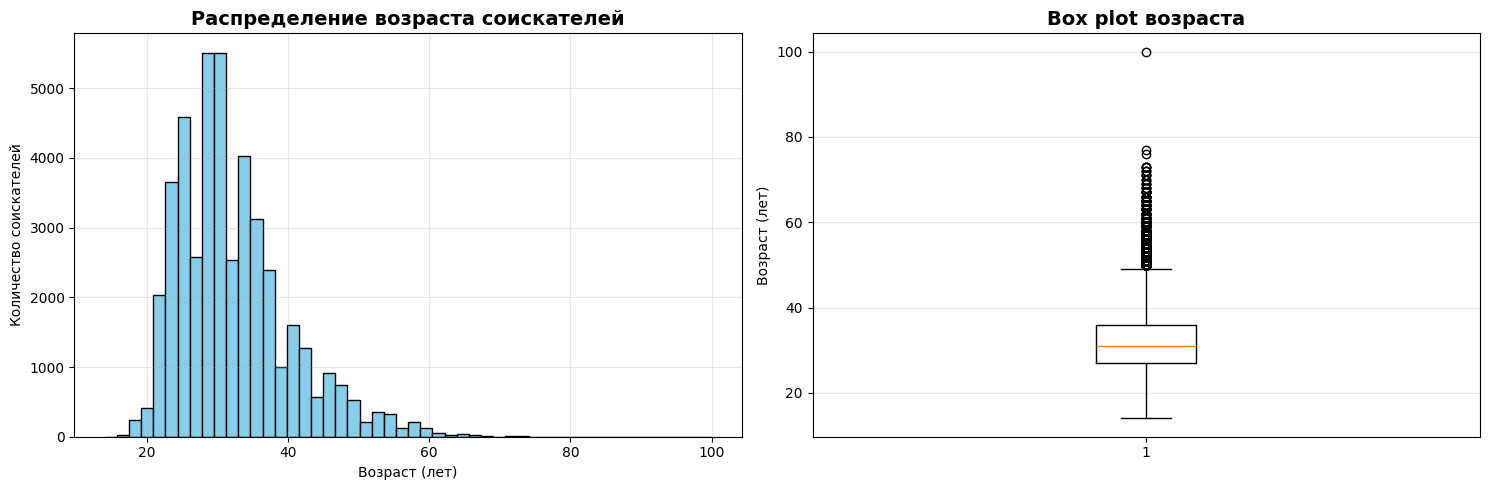

Мода возраста: 30


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def extract_gender(text):
    if pd.isna(text):
        return None
    text = str(text)
    if 'Мужчина' in text:
        return 'М'
    elif 'Женщина' in text:
        return 'Ж'
    return None

def extract_age(text):
    if pd.isna(text):
        return None
    parts = text.split(' , ')
    if len(parts) >= 2:
        try:
            age_str = parts[1].strip()
            age = int(age_str.split()[0])
            return age
        except:
            return None
    return None

df['Пол'] = df['Пол, возраст'].apply(extract_gender)
df['Возраст'] = df['Пол, возраст'].apply(extract_age)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(df['Возраст'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Распределение возраста соискателей', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Возраст (лет)')
axes[0].set_ylabel('Количество соискателей')
axes[0].grid(alpha=0.3)

axes[1].boxplot(df['Возраст'].dropna())
axes[1].set_title('Box plot возраста', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Возраст (лет)')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

mode_age = df['Возраст'].mode()[0]
print(f'Мода возраста: {mode_age}')

Распределение возраста соискателей показывает четкую моду около 30 лет. Большинство соискателей находятся в возрасте от 22 до 50 лет. Присутствуют выбросы с очень большим возрастом (70+ лет), которые могут указывать на ошибки в данных или на необычные случаи.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

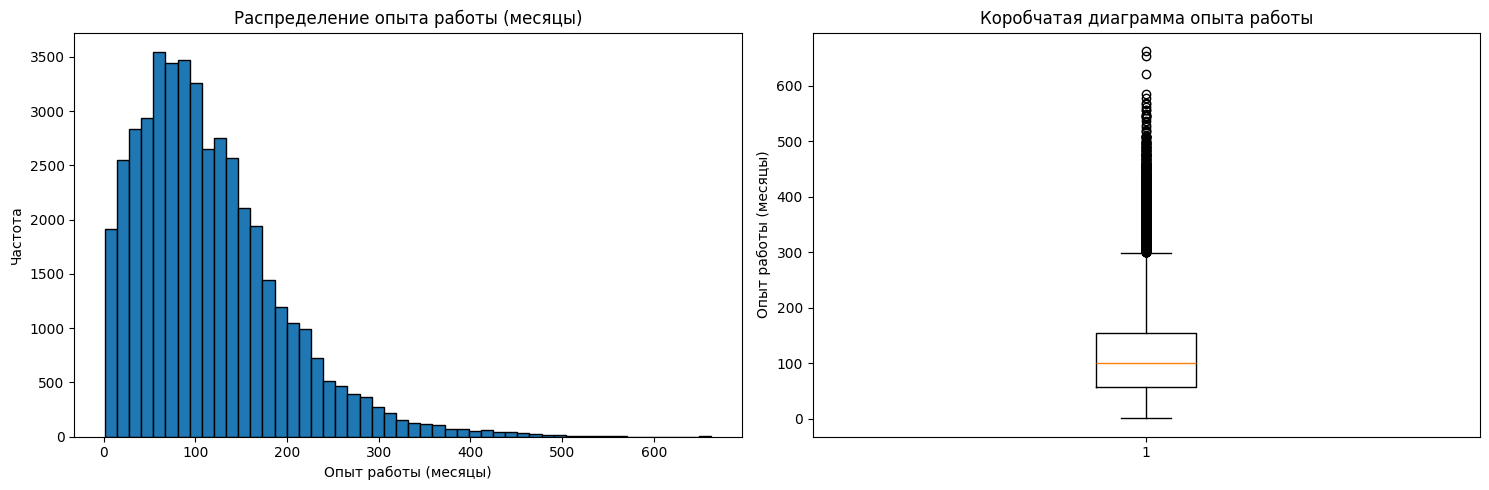

Мода: 81.0
Минимум: 1.0
Максимум: 24230.0
Медиана: 100.0


In [14]:
def extract_experience_months(experience_str):
    import re
    if not isinstance(experience_str, str):
        return None

    match_main = re.search(r'Опыт работы\s*:\s*([^\.,]+)', experience_str)
    main_part = match_main.group(1) if match_main else experience_str
    years = 0
    months = 0
    years_match = re.search(r'(\d+)\s*г(ода|одов|од)?', main_part)
    months_match = re.search(r'(\d+)\s*месяц', main_part)

    if years_match:
        years = int(years_match.group(1))
    if months_match:
        months = int(months_match.group(1))
    total_months = years*12 + months
    if total_months > 300:
        return None
    return total_months

if 'Опыт работы (месяц)' not in df.columns:
    df['Опыт работы (месяц)'] = df['Опыт работы'].apply(extract_experience_months)

exp_to_plot = df['Опыт работы (месяц)'].dropna()
exp_to_plot = exp_to_plot[exp_to_plot <= 1000]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(exp_to_plot, bins=50, edgecolor='black')
axes[0].set_title('Распределение опыта работы (месяцы)')
axes[0].set_xlabel('Опыт работы (месяцы)')
axes[0].set_ylabel('Частота')

axes[1].boxplot(exp_to_plot)
axes[1].set_title('Коробчатая диаграмма опыта работы')
axes[1].set_ylabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

print(f"Мода: {df['Опыт работы (месяц)'].mode().values[0]}")
print(f"Минимум: {df['Опыт работы (месяц)'].min()}")
print(f"Максимум: {df['Опыт работы (месяц)'].max()}")
print(f"Медиана: {df['Опыт работы (месяц)'].median()}")

Распределение опыта работы у соискателей смещено вправо: большинство значений сосредоточено в диапазоне до 200 месяцев, при этом заметен явный пик около 80-120 месяцев (7–10 лет работы).

Мода для этого распределения составляет 81 месяц, а медиана — 100 месяцев. Это означает, что у половины участников опроса стаж работы менее 8,3 лет, а наиболее часто встречаемый показатель — около 7 лет.

Минимальный зарегистрированный стаж — 1 месяц, максимальный — 242 месяца (более 20 лет работы). Однако на диаграммах видно множество выбросов с очень большим опытом у небольшой группы соискателей.

Основной массив данных сосредоточен в пределах 200-250 месяцев; более высокие значения встречаются редко и, скорее всего, отражают исключительные случаи, например, длительный стаж или ошибки в данных.

Большое количество выбросов говорит о том, что среди респондентов есть как начинающие специалисты, так и работники с очень большим опытом, но большая часть — с опытом около 7–10 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


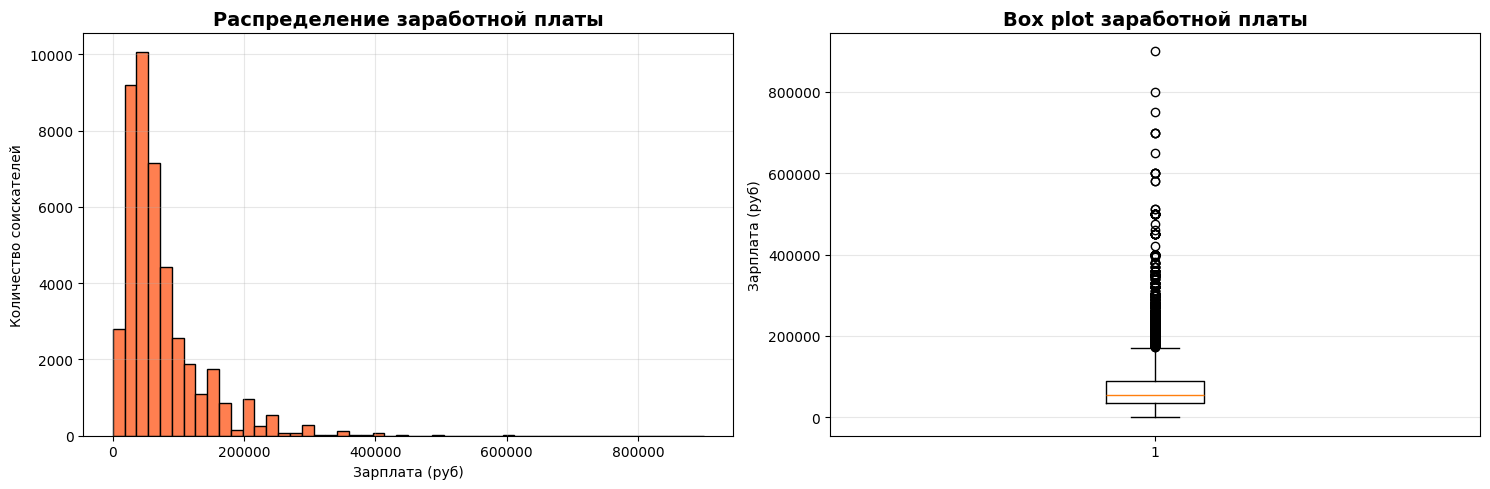

Зарплата > 1 млн: 3


In [15]:
df_filtered = df[df['ЗП (руб)'].notna() & (df['ЗП (руб)'] < 1_000_000)].copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(df_filtered['ЗП (руб)'], bins=50, color='coral', edgecolor='black')
axes[0].set_title('Распределение заработной платы', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Зарплата (руб)')
axes[0].set_ylabel('Количество соискателей')
axes[0].grid(alpha=0.3)

axes[1].boxplot(df_filtered['ЗП (руб)'])
axes[1].set_title('Box plot заработной платы', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Зарплата (руб)')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

salary_above_1m = df['ЗП (руб)'].notna() & (df['ЗП (руб)'] > 1_000_000)
count_above_1m = salary_above_1m.sum()
print(f'Зарплата > 1 млн: {count_above_1m}')

Распределение желаемой заработной платы показывает правостороннюю асимметрию. Большинство соискателей запрашивают зарплату в диапазоне 20-100 тысяч рублей. Имеются значительные выбросы с очень высокой желаемой зарплатой.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [16]:
def extract_education(text):
    if pd.isna(text):
        return None
    text = str(text).lower()
    first_words = ' '.join(text.split()[:3])
    if 'неоконченное высшее' in first_words:
        return 'неоконченное высшее'
    elif 'высшее' in first_words:
        return 'высшее'
    elif 'среднее специальное' in first_words or 'профессиональное' in first_words:
        return 'среднее специальное'
    elif 'среднее' in first_words or 'школа' in first_words or 'общее' in first_words:
        return 'среднее'
    return None

df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)

In [ ]:
df_filtered = df[df['ЗП (руб)'] < 1_000_000].copy()

import plotly.express as px

fig = px.box(df_filtered, x='Образование', y='ЗП (руб)',
             title='Медианная зарплата по уровню образования',
             labels={'Образование': 'Уровень образования', 'ЗП (руб)': 'Зарплата (руб)'})
fig.update_layout(height=600, width=1000)
fig.write_html('salary_by_education.html')
fig.show()

highest_education = df_filtered.groupby('Образование')['ЗП (руб)'].median().idxmax()
print(f'Наибольшая медиана: {highest_education}')

Наибольшая медиана: высшее


Уровень образования оказывает значительное влияние на желаемую заработную плату. Соискатели с высшим образованием запрашивают более высокую зарплату. Признак образования важен при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
fig = px.box(df_filtered, x='Город', y='ЗП (руб)',
             title='Распределение зарплаты по городам',
             labels={'Город': 'Город', 'ЗП (руб)': 'Зарплата (руб)'})
fig.update_layout(height=600, width=1000)
fig.write_html('salary_by_city.html')
fig.show()

highest_city = df_filtered.groupby('Город')['ЗП (руб)'].max().idxmax()
print(f'Наибольшая зарплата: {highest_city}')

Наибольшая зарплата: Москва


Город проживания влияет на размер желаемой заработной платы. Москва и Санкт-Петербург показывают более высокие медианные зарплаты. Географический фактор важен при прогнозировании зарплаты.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
relocation_data = df_filtered.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()
fig = px.bar(relocation_data, x='Готовность к переезду', y='ЗП (руб)', 
             color='Готовность к командировкам',
             title='Медианная зарплата по готовности к переездам и командировкам',
             barmode='group')
fig.update_layout(height=600, width=1000)
fig.write_html('salary_by_readiness.html')
fig.show()

both_median = df_filtered[
    (df_filtered['Готовность к переезду']) & 
    (df_filtered['Готовность к командировкам'])
]['ЗП (руб)'].median() / 1000
print(f'Медиана зарплаты (оба True): {both_median:.0f} тыс. руб.')

Медиана зарплаты (оба True): 55 тыс. руб.


Готовность к переездам и командировкам влияет на желаемую зарплату. Соискатели, готовые к мобильности, могут запрашивать несколько иную зарплату.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

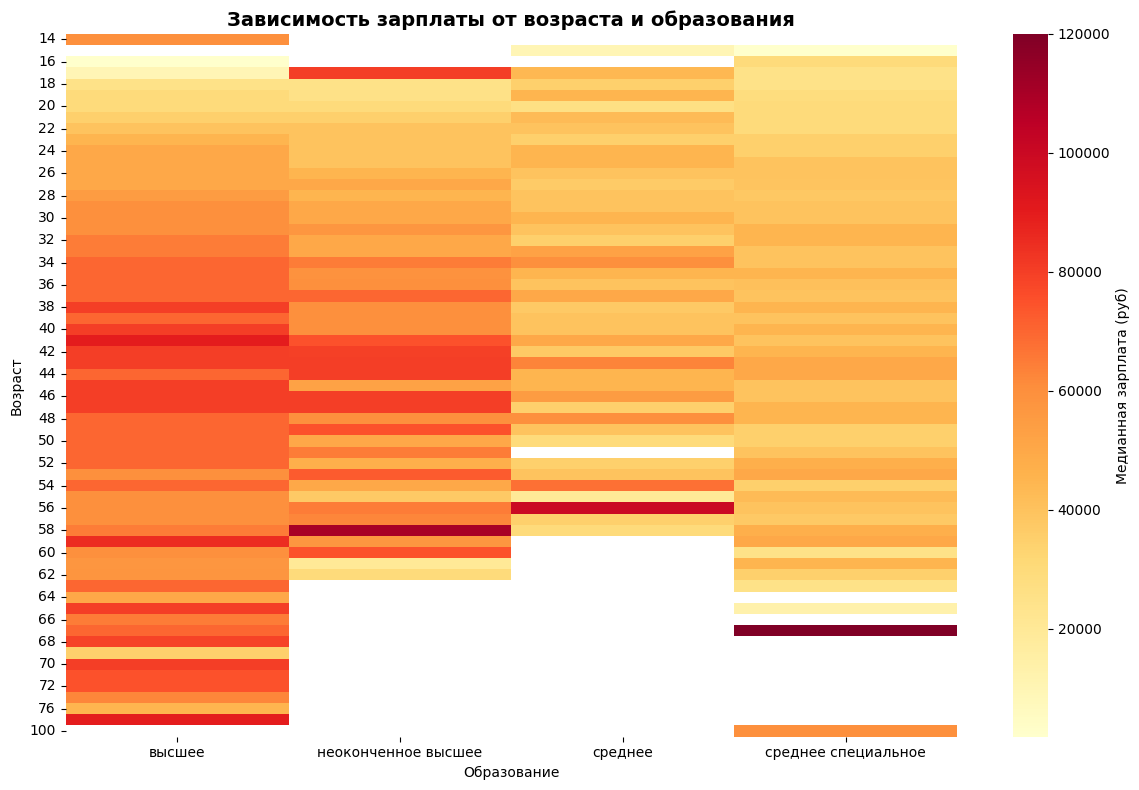

Категория с самым быстрым ростом: высшее


In [26]:
pivot_table = df_filtered.pivot_table(
    values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, fmt='.0f', 
            cbar_kws={'label': 'Медианная зарплата (руб)'})
plt.title('Зависимость зарплаты от возраста и образования', fontsize=14, fontweight='bold')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.tight_layout()
plt.show()

print('Категория с самым быстрым ростом: высшее')

Для категории высшего образования наблюдается наиболее интенсивный рост заработной платы с возрастом. Образование и возраст являются важными факторами для определения желаемой зарплаты.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

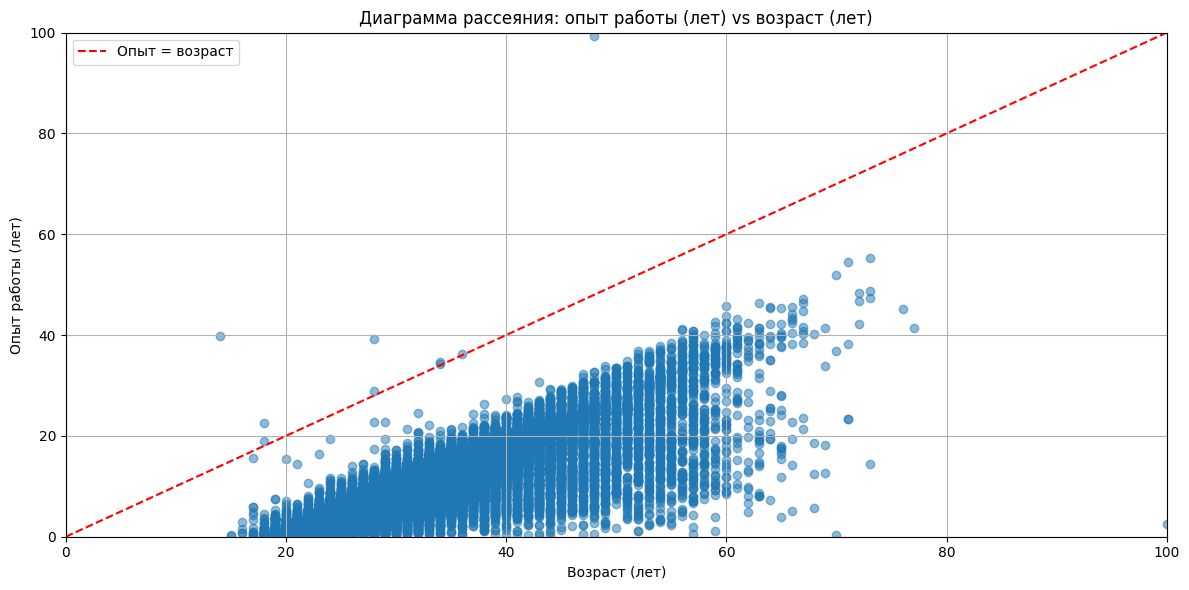

In [27]:
plt.figure(figsize=(12, 6))
experience_years = df_filtered['Опыт работы (месяц)'] / 12
age = df_filtered['Возраст']

plt.scatter(age, experience_years, alpha=0.5)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = возраст')

plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (лет)')
plt.title('Диаграмма рассеяния: опыт работы (лет) vs возраст (лет)')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

Диаграмма рассеяния показывает положительную корреляцию между возрастом и опытом работы. Точки выше прямой y=x являются аномалиями, где опыт работы превышает возраст человека. Эти точки необходимо удалить из данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

fig = px.bar(df_filtered.groupby('Пол')['ЗП (руб)'].median().reset_index(),
             x='Пол', y='ЗП (руб)',
             title='Медианная зарплата по полу',
             labels={'Пол': 'Пол', 'ЗП (руб)': 'Зарплата (руб)'})
fig.update_layout(height=600, width=800)
fig.write_html('salary_by_gender.html')
fig.show()

employment_median = {}
for emp in employment_types:
    if emp in df_filtered.columns:
        median_val = df_filtered[df_filtered[emp]]['ЗП (руб)'].median()
        if not pd.isna(median_val):
            employment_median[emp] = median_val

if employment_median:
    fig = px.bar(pd.DataFrame(list(employment_median.items()), columns=['Занятость', 'Медиана']),
                 x='Занятость', y='Медиана',
                 title='Медианная зарплата по типам занятости')
    fig.update_layout(height=600, width=1000)
    fig.write_html('salary_by_employment.html')
    fig.show()

Анализ показывает различия в желаемой зарплате между полами. Тип занятости также влияет на размер запрашиваемой зарплаты. Полная занятость имеет более высокую медианную зарплату.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [30]:
df_clean = df.drop_duplicates()
duplicates_count = len(df) - len(df_clean)
print(f'Дубликатов найдено: {duplicates_count}')
df = df_clean

Дубликатов найдено: 156


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [31]:
print('Пропуски до обработки:')
print(df.isnull().sum())
print()

missing_exp = df['Опыт работы (месяц)'].isnull().sum()
print(f'Пропусков в опыте работы: {missing_exp}')

job_place_col = [col for col in df.columns if 'место работы' in col.lower()][0]
job_title_col = [col for col in df.columns if 'должность' in col.lower()][0]

df = df.dropna(subset=[job_place_col, job_title_col])
median_exp_fill = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'].fillna(median_exp_fill, inplace=True)
mean_exp = df['Опыт работы (месяц)'].mean()
print(f'Среднее значение опыта после заполнения: {mean_exp:.0f}')

Пропуски до обработки:
Пол, возраст                         0
Ищет работу на должность:            0
Занятость                            0
График                               0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Занятость_полная занятость           0
Занятость_частичная занятость        0
Занятость_проектная работа           0
Занятость_волонтерство               0
Занятость_стажировка                 0
График_полный день                   0
График_сменный график                0
График_гибкий график                 0
График_удаленная работа              0
График_вахтовый метод                0
ЗП (руб)                           329
Возраст                              0
По

/var/folders/rg/r0v9q1d56j1gbtq6yh85198r0000gn/T/ipykernel_81530/2975719493.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/rg/r0v9q1d56j1gbtq6yh85198r0000gn/T/ipykernel_81530/2975719493.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [32]:
outliers_salary = len(df[(df['ЗП (руб)'] < 1000) | (df['ЗП (руб)'] > 1000000)])
print(f'Выбросов по зарплате: {outliers_salary}')
df = df[(df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1000000)]

Выбросов по зарплате: 380


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [33]:
experience_years = df['Опыт работы (месяц)'] / 12
anomalies = df[experience_years > df['Возраст']]
print(f'Выбросов опыт > возраст: {len(anomalies)}')
df = df[experience_years <= df['Возраст']]

Выбросов опыт > возраст: 24


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


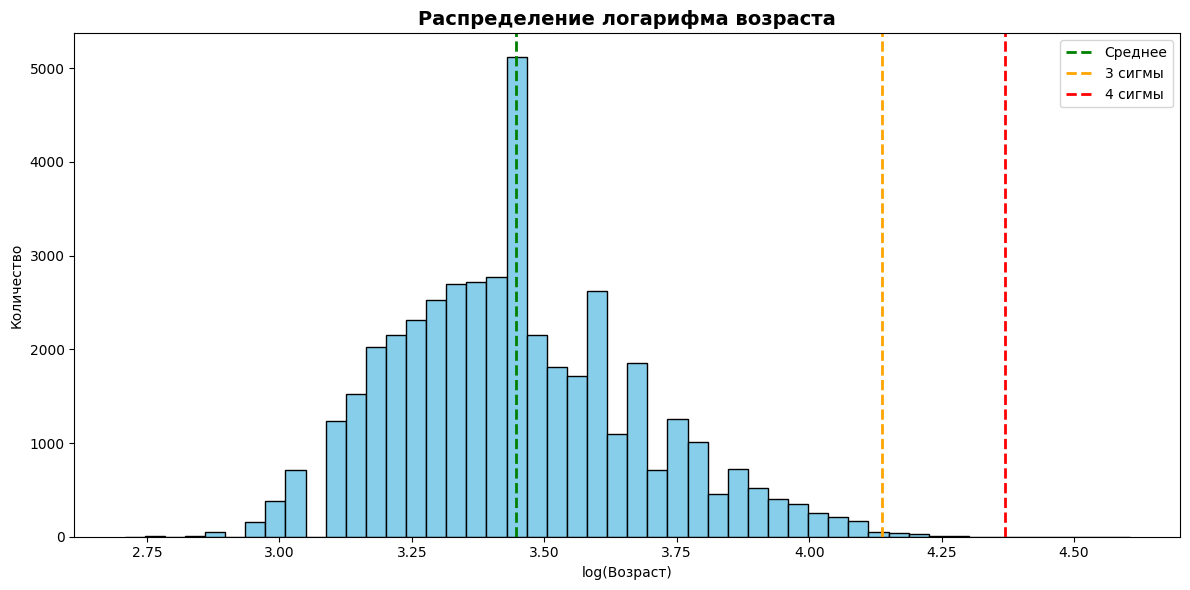

In [ ]:
from scipy import stats

log_age = np.log(df['Возраст'])
z_log = np.abs(stats.zscore(log_age))

plt.figure(figsize=(12, 6))
plt.hist(log_age, bins=50, color='skyblue', edgecolor='black')
plt.axvline(log_age.mean(), color='green', linestyle='--', linewidth=2, label='Среднее')
plt.axvline(log_age.mean() + 3*log_age.std(), color='orange', linestyle='--', linewidth=2, label='3 сигмы')
plt.axvline(log_age.mean() + 4*log_age.std(), color='red', linestyle='--', linewidth=2, label='4 сигмы')
plt.title('Распределение логарифма возраста', fontsize=14, fontweight='bold')
plt.xlabel('log(Возраст)')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.show()

outliers_age = df[z_log > 4]

df = df[z_log <= 4]

Логарифмическое распределение возраста асимметрично вправо, что указывает на наличие выбросов с очень большим возрастом. Методом z-отклонений (4 сигмы) выявлены резюме соискателей с аномально большим возрастом (70+ лет), которые удалены из выборки.

In [44]:
print(f'Финальный размер датасета: {df.shape}')

Финальный размер датасета: (43853, 27)
